In [1]:
import requests

In [3]:
group_id = 'hse_university' # '25205856'
access_token = 'a161b4dca161b4dca161b4dc27a107ebb8aa161a161b4dcfc1acecf46c7682af9752ac8'

In [99]:
def get_wall_post(group_id, access_token, count=10, offset=0):
    wall_url = \
        f'https://api.vk.com/method/wall.get?domain={group_id}&access_token={access_token}&count={count}&offset={offset}&v=5.8'

    json_response = requests.get(wall_url).json()
    if json_response.get('error'):
        print('json_error')
        return list(), wall_url

    return json_response[u'response'], wall_url

In [100]:
response, _ = get_wall_post(group_id, access_token, count=2)

In [101]:
type(response)

dict

In [102]:
response

{'count': 10764,
 'items': [{'id': 49874,
   'from_id': -25205856,
   'owner_id': -25205856,
   'date': 1560964430,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': 'Учеба в Вышке может принять совершенно неожиданный оборот. Курсов по приручению динозавров, конечно, нет в учебных планах на следующий год, но кто знает, что ждет нас в будущем. Потому что ВШЭ — уже давно не только Э!',
   'is_pinned': 1,
   'attachments': [{'type': 'video',
     'video': {'id': 456239666,
      'owner_id': -25205856,
      'title': 'Высшая школа не только экономики',
      'duration': 97,
      'description': 'Учеба в Вышке может принять совершенно неожиданный оборот. Курсов по приручению динозавров, конечно, нет в учебных планах на следующий год, но кто знает, что ждет нас в будущем. Потому что ВШЭ — уже давно не только Э! \n\nВсё о бакалавриате: ba.hse.ru \nВсё о магистратуре: ma.hse.ru ',
      'date': 1560964399,
      'comments': 1,
      'views': 1425,
      'local_views': 1425,
      'phot

In [25]:
type(response['items'])

list

In [26]:
len(response['items'])

2

In [10]:
type(response['items'][0])

dict

In [11]:
response = response['items'][0]

In [12]:
response

{'id': 49874,
 'from_id': -25205856,
 'owner_id': -25205856,
 'date': 1560964430,
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Учеба в Вышке может принять совершенно неожиданный оборот. Курсов по приручению динозавров, конечно, нет в учебных планах на следующий год, но кто знает, что ждет нас в будущем. Потому что ВШЭ — уже давно не только Э!',
 'is_pinned': 1,
 'attachments': [{'type': 'video',
   'video': {'id': 456239666,
    'owner_id': -25205856,
    'title': 'Высшая школа не только экономики',
    'duration': 97,
    'description': 'Учеба в Вышке может принять совершенно неожиданный оборот. Курсов по приручению динозавров, конечно, нет в учебных планах на следующий год, но кто знает, что ждет нас в будущем. Потому что ВШЭ — уже давно не только Э! \n\nВсё о бакалавриате: ba.hse.ru \nВсё о магистратуре: ma.hse.ru ',
    'date': 1560964399,
    'comments': 1,
    'views': 1424,
    'local_views': 1424,
    'photo_130': 'https://sun9-65.userapi.com/c855228/v855228101/72570/Cv

In [13]:
type(response)

dict

In [14]:
response['date']

1560964430

In [15]:
response['text']

'Учеба в Вышке может принять совершенно неожиданный оборот. Курсов по приручению динозавров, конечно, нет в учебных планах на следующий год, но кто знает, что ждет нас в будущем. Потому что ВШЭ — уже давно не только Э!'

In [16]:
response['comments']['count']

23

In [17]:
response['likes']['count']

264

In [18]:
response['reposts']['count']

17

# Какие вопросы можно задать?

1. Связь числа лайков, репостов и комментариев
2. Популярность слов в постах на стене в сообществе -> анализ тональности
3. Частота записей по дням недели
4. Еще?

In [27]:
import pandas as pd

In [43]:
response, _ = get_wall_post(group_id, access_token, count=100)

In [44]:
def get_meta_data(response):
    meta_data = pd.DataFrame(columns=['id', 'text', 'date', 'comments', 'likes', 'reposts'])
    for message in response['items']:
        row = {
            'id': message['id'],
            'text': message['text'],
            'date': message['date'],
            'comments': message['comments']['count'],
            'likes': message['likes']['count'],
            'reposts': message['reposts']['count']
        }
        meta_data = meta_data.append(row, ignore_index=True)
    return meta_data

In [45]:
df = get_meta_data(response)

In [69]:
df.head(3)

,id,text,date,comments,likes,reposts
0,49874,Учеба в Вышке может принять совершенно неожида...,1560964430,23,264,17
1,51842,На выставочной площадке [club21317467|Школы ди...,1568373843,0,6,0
2,51841,"Работать с большими данными, упростить выполне...",1568366128,0,28,3


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

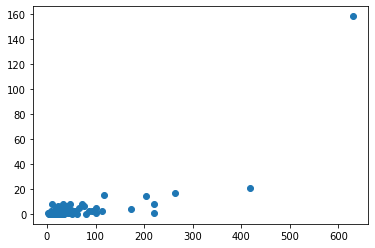

In [66]:
plt.scatter(df.likes, df.reposts)

In [67]:
likes = df.likes[df.likes < 400]
reposts = df.reposts[df.likes < 400]

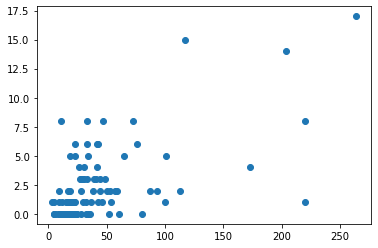

In [68]:
plt.scatter(likes, reposts)

In [107]:
import time
from tqdm import tqdm_notebook

In [108]:
meta = pd.DataFrame(columns=['id', 'text', 'date', 'comments', 'likes', 'reposts'])
for n in tqdm_notebook(range(100)):
    response, _ = get_wall_post(group_id, access_token, count=100, offset=n*100)
    df = get_meta_data(response)
    meta = pd.concat([meta, df])

In [109]:
meta

,id,text,date,comments,likes,reposts
0,49874,Учеба в Вышке может принять совершенно неожида...,1560964430,23,264,17
1,51842,На выставочной площадке [club21317467|Школы ди...,1568373843,0,8,0
2,51841,"Работать с большими данными, упростить выполне...",1568366128,0,29,3
3,51833,"«Припудрить носик», уборная или туалет. Мы при...",1568306280,0,23,1
4,51831,В этом году поддержать студенческие инициативы...,1568302140,1,8,0
5,51830,"«День Вышки – это классно. Здесь лампово, крас...",1568298000,0,46,1
6,51825,Что делает школу «хорошей»: высокий средний ба...,1568284800,0,17,2
7,51824,Открылась подача заявок на конкурс научно-иссл...,1568280721,0,11,8
8,51821,Вышка усилила свои позиции в мировом рейтинге ...,1568276875,0,54,1
9,51818,Изучаем фотоальбом [club185420171|Дня Вышки 20...,1568219812,0,17,1


In [129]:
meta.index = list(range(10000))

In [130]:
meta.to_csv('hse_university_wall_posts.csv')

In [112]:
import datetime

In [118]:
datetime.datetime.fromtimestamp(1338455002)

datetime.datetime(2012, 5, 31, 13, 3, 22)

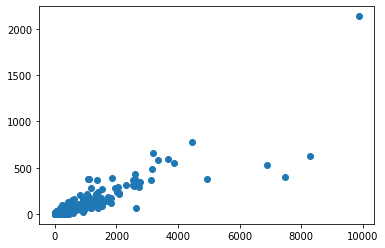

In [120]:
plt.scatter(meta.likes, meta.reposts)

In [126]:
likes = meta.likes[meta.likes > 200]
reposts = meta.reposts[meta.likes > 200]

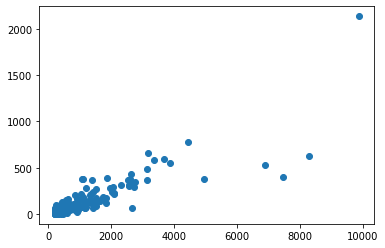

In [127]:
plt.scatter(likes, reposts)

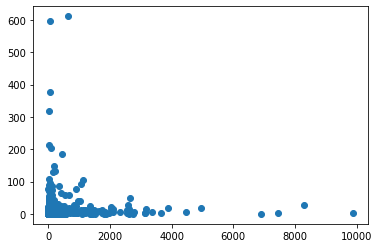

In [133]:
plt.scatter(meta.likes, meta.comments)

In [139]:
np.unique(meta.likes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184,
       185, 186, 187, 188, 190, 192, 193, 194, 196, 197, 200, 201, 202,
       203, 204, 205, 206, 207, 209, 210, 213, 21

In [145]:
meta.likes.quantile(0.95)

113.0

In [144]:
meta.likes.quantile(0.05)

5.0

In [149]:
index = meta.likes.between(5, 113, inclusive=False)
likes = meta.likes[index]
comments = meta.comments[index]

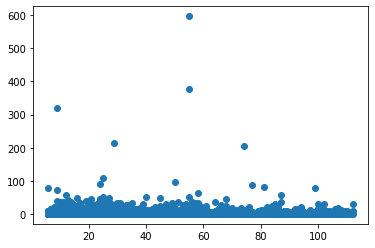

In [150]:
plt.scatter(likes, comments)

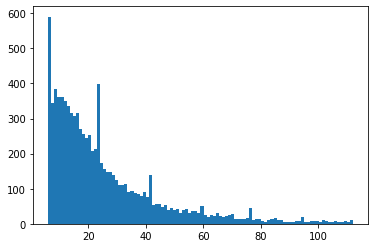

In [152]:
plt.hist(likes, bins=100);

In [169]:
index = meta.comments.between(meta.comments.quantile(0.05), meta.comments.quantile(0.95), inclusive=True)
comments = meta.comments[index]

In [174]:
meta.comments.quantile(0.7)

1.0

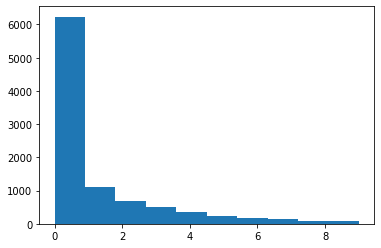

In [171]:
plt.hist(comments);

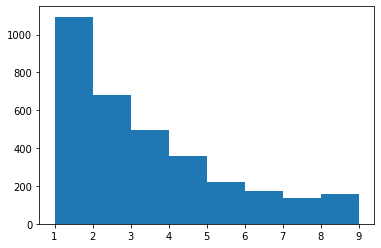

In [178]:
index = meta.comments.between(meta.comments.quantile(0.7), meta.comments.quantile(0.95), inclusive=True)
comments = meta.comments[index]
plt.hist(comments, bins=8);

In [164]:
np.unique(meta.comments, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 50, 51, 56, 57, 58, 59, 64,
        65, 72, 73, 76, 77, 78, 82, 85, 86, 90, 93, 96, 105, 108, 129, 132,
        147, 185, 204, 213, 319, 377, 597, 611], dtype=object),
 array([6233, 1094,  678,  493,  359,  223,  174,  135,   83,   77,   65,
          48,   48,   35,   22,   16,   19,   17,   15,   11,   13,    8,
           7,   14,    3,    3,   12,    3,    4,    6,    4,    6,    4,
           4,    3,    4,    4,    1,    4,    1,    1,    4,    1,    1,
           2,    3,    3,    1,    1,    1,    1,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1]))

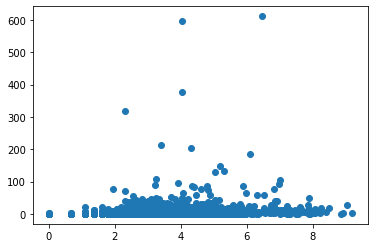

In [132]:
plt.scatter(np.log1p(meta.likes.values.astype(float)), meta.comments)

In [180]:
group_id = 'hse_overheard'

meta2 = pd.DataFrame(columns=['id', 'text', 'date', 'comments', 'likes', 'reposts'])
for n in tqdm_notebook(range(100)):
    response, _ = get_wall_post(group_id, access_token, count=100, offset=n*100)
    df = get_meta_data(response)
    meta2 = pd.concat([meta2, df])

In [181]:
meta2

,id,text,date,comments,likes,reposts
0,425359,"Анонимно) \nРебята, кто изучает и очень любит ...",1568376600,0,0,0
1,425357,Ищу учебник English file ELEMENTARY,1568374800,0,0,0
2,425355,Ребята с майноров психология и современное иск...,1568373000,2,0,0
3,425348,анонимно) \nкто с уб первый курс и тоже ищет д...,1568371200,1,0,0
4,425343,Анон. Продам учебник Ready For IELTS в электро...,1568369400,9,1,0
5,425340,До 20 сентября первый покур 500 рублей на любо...,1568365740,0,0,0
6,425302,Кто может отдать/продать учебник по французско...,1568362200,0,0,0
7,425294,"Кто хочет на майнор ""Менеджмент"", напишите в Л...",1568358709,0,0,0
8,425287,"Ребят, кто нибудь учится на факультете ""Управл...",1568340600,1,0,0
9,425286,Кто хочет на майнор Human Rights? Обменяю на н...,1568338800,0,1,0


In [183]:

datetime.datetime.fromtimestamp(1517771400)

datetime.datetime(2018, 2, 4, 22, 10)

In [184]:
meta2.index = list(range(10000))

In [185]:
meta2.to_csv('hse_overheard_wall_posts.csv')